In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.applications import MobileNet,VGG16
import matplotlib.pyplot as plt

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 18F9-CC6C

 Directory of C:\Users\STSC\OneDrive - horizon.csueastbay.edu\Documents\TensorFlow\Coursera\CNN

10/25/2021  05:25 PM    <DIR>          .
10/25/2021  05:25 PM    <DIR>          ..
10/22/2021  04:25 PM    <DIR>          .ipynb_checkpoints
09/15/2021  10:40 PM    <DIR>          cats_and_dogs_filtered
09/16/2021  03:09 AM        76,797,656 catvsdogs_1631786994.h5
10/25/2021  03:11 PM    <DIR>          dataset
10/25/2021  05:25 PM         1,282,373 Face Mask Detection.ipynb
09/17/2021  12:19 AM        87,910,968 inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
10/25/2021  03:06 PM        11,483,520 mask_detector.model
10/25/2021  04:48 PM       105,970,064 MaskDetection.h5
10/22/2021  04:21 PM    <DIR>          New Masks Dataset
09/16/2021  03:14 AM         1,252,908 Week 1 - cat vs Dogs.ipynb
10/22/2021  04:24 PM           841,087 Week 2 - Image Augmentation.ipynb
10/22/2021  04:26 PM         1,524,530 Week 3 - Tran

### <font color = 'red'> Reading data from Folders unsing IMAGEDATA GENERATOR

In [3]:
train_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                    rescale=1./255,
                                    horizontal_flip=True,
                                  fill_mode='nearest')

In [4]:
valid_generator = ImageDataGenerator(rescale=1./255)

In [5]:
train_dir = "C:\\Users\\STSC\OneDrive - horizon.csueastbay.edu\\Documents\\TensorFlow\\Coursera\\CNN\\dataset" 

In [6]:
valid_dir = "C:\\Users\\STSC\OneDrive - horizon.csueastbay.edu\\Documents\\TensorFlow\\Coursera\\CNN\\New Masks Dataset\\Validation" 

In [7]:
training = train_generator.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=20,
                                              classes=['Mask','Non Mask'],)

Found 4233 images belonging to 2 classes.


In [8]:
validation = valid_generator.flow_from_directory(valid_dir,
                                                target_size=(224,224),
                                                 class_mode='binary',
                                                 batch_size=20,
                                                classes=['Mask','Non Mask'])

Found 306 images belonging to 2 classes.


- ### <Font color = 'red'> Now training and validatation are loaded with respective their class labels.

- ### <Font color = 'red'> Note that data is loaded in batches that is there are 3833 in training directory and our batch size while pulling the data is 20,so we will have around 190 batches of data with each having 20 images with repsective labels



In [9]:
# Each batch can be accesed by using a key word next()

(image,labels) = next(training)

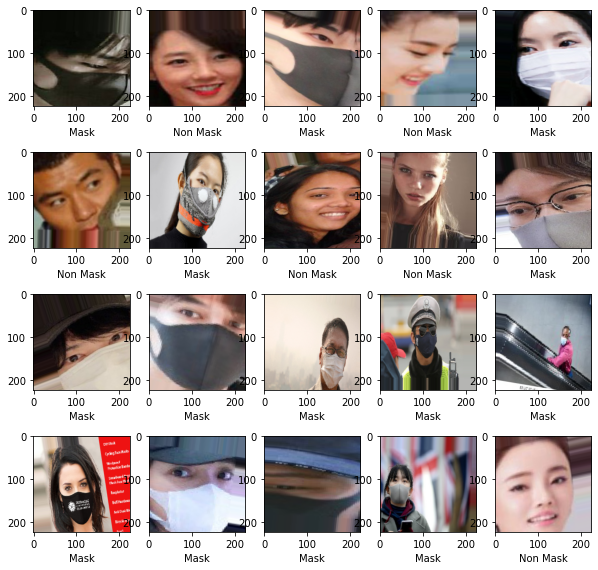

In [10]:
# Plotting images 

plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
    plt.xlabel("Mask" if int(labels[i])==0.0 else "Non Mask")

#### Pre trained Model Mobilenet

In [11]:
pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                               weights='imagenet',include_top=False)

In [12]:
pre_trained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

#### We can access any layer we want from the pre trained model.

In [13]:
pre_trained_model.get_layer("block_11_add")

- <font color = 'red' size = 4> **Main purpose behind transfer learning is to use pre trained model & use its weights, so that we can reduce the compuational time in training the model.**
- <font size =4>So before working with pretarined models like **Mobilenet**,**VGG**,**ResNet** we need to make sure that the layers in pretained model is frezzed and not used for training.

In [14]:
# Freezing already trained layers in the pretrained layers

for layer in pre_trained_model.layers:
    layer.trainable = False

Using the output of pretained model as our first layer

In [15]:
model = Flatten()(pre_trained_model.output)
model = Dense(64,activation = tf.nn.relu)(model)
model = Dropout(0.5)(model)
model = Dense(64,activation = tf.nn.relu)(model)
model = Dense(1,activation = tf.nn.sigmoid)(model)

In [16]:
main_model = tf.keras.Model(pre_trained_model.input,model)

In [17]:
main_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [18]:
main_model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics='accuracy')

In [19]:
history = main_model.fit(training,
                         batch_size=32,
                         epochs=10,
                         validation_data=validation,
                         validation_steps=10)

Epoch 1/10
 71/212 [=========>....................] - ETA: 1:09 - loss: 1.1876 - accuracy: 0.8430

C:\Users\STSC\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


212/212 [==============================] - 115s 532ms/step - loss: 0.5146 - accuracy: 0.9109 - val_loss: 0.0162 - val_accuracy: 0.9950
Epoch 2/10
212/212 [==============================] - 120s 566ms/step - loss: 0.1735 - accuracy: 0.9452 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 3/10
212/212 [==============================] - 118s 557ms/step - loss: 0.1281 - accuracy: 0.9582 - val_loss: 0.0526 - val_accuracy: 0.9800
Epoch 4/10
212/212 [==============================] - 117s 554ms/step - loss: 0.1156 - accuracy: 0.9596 - val_loss: 0.0151 - val_accuracy: 0.9950
Epoch 5/10
212/212 [==============================] - 122s 573ms/step - loss: 0.1175 - accuracy: 0.9624 - val_loss: 0.0158 - val_accuracy: 0.9900
Epoch 6/10
212/212 [==============================] - 122s 576ms/step - loss: 0.1043 - accuracy: 0.9634 - val_loss: 0.0413 - val_accuracy: 0.9900
Epoch 7/10
212/212 [==============================] - 121s 569ms/step - loss: 0.0837 - accuracy: 0.9686 - val_loss: 0.0028 - val_accura

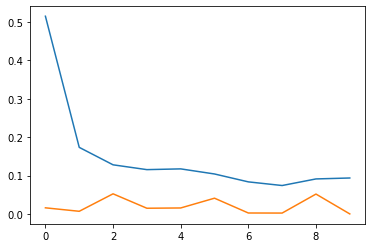

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

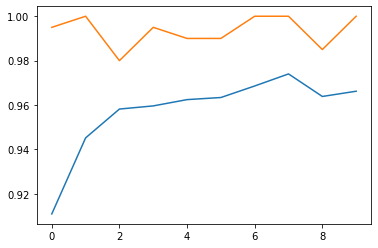

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [22]:
history.history

{'loss': [0.51457279920578,
  0.17349205911159515,
  0.12808267772197723,
  0.1155652329325676,
  0.11752447485923767,
  0.10426299273967743,
  0.0837302878499031,
  0.07423104345798492,
  0.09137322753667831,
  0.09382069110870361],
 'accuracy': [0.9109378457069397,
  0.9451925158500671,
  0.9581856727600098,
  0.9596031308174133,
  0.9624379873275757,
  0.9633829593658447,
  0.9685801863670349,
  0.9740136861801147,
  0.9638554453849792,
  0.9662178158760071],
 'val_loss': [0.016225554049015045,
  0.007211217191070318,
  0.052637528628110886,
  0.015140675008296967,
  0.01584373600780964,
  0.041271135210990906,
  0.0027708029374480247,
  0.0025875756982713938,
  0.05201779678463936,
  0.00037248150329105556],
 'val_accuracy': [0.9950000047683716,
  1.0,
  0.9800000190734863,
  0.9950000047683716,
  0.9900000095367432,
  0.9900000095367432,
  1.0,
  1.0,
  0.9850000143051147,
  1.0]}

In [23]:
main_model.save("MaskDetection.h5")

C:\Users\STSC\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [24]:
img,labels = next(validation)

In [25]:
pred = main_model.predict(img)
pred = pd.DataFrame(pred,columns = ['prob'])
pred

,prob
0,1.000000e+00
1,1.000000e+00
2,4.952252e-04
3,1.000000e+00
4,1.000000e+00
5,1.000000e+00
6,3.111483e-11
7,1.009912e-04
8,1.000000e+00
9,1.000000e+00


In [26]:
l = list(pred['prob'].apply(lambda x :"Mask on" if x < 0.5 else "Mask Off").values)
l

['Mask Off',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask Off',
 'Mask Off']

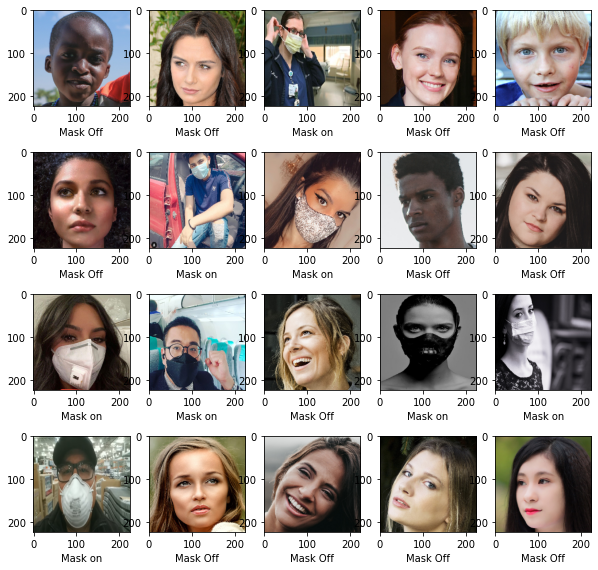

In [27]:
c = 0
plt.figure(figsize=(10,10))
for i in img:
    c = c+1
    plt.subplot(4,5,c)
    plt.imshow(i)
    plt.xlabel(str(l[c-1]))

In [ ]:
# import tensorflow as tf
from tensorflow.keras.models import load_model
import pydot

mask_detection_model = load_model('MaskDetection.h5')

def mask(img):    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255
    img = cv2.resize(img,(224,224))     # resize image to match model's expected sizing
    img = img.reshape(1,224,224,3) # return the image with shaping that TF wants
    
    pred = mask_detection_model.predict(img)[0][0]
    
    if pred < 0.5:
        pred = 100-round(pred,2)*100
        out = 'Mask On'
    else:
        pred = round(pred,2)*100
        out = 'No Mask'
        
    
    
    return out,str(pred)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

mp_Face_detect = mp.solutions.face_detection
mp_drawings = mp.solutions.drawing_utils


import cv2
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils


# For webcam input:
video_capture = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(model_selection=0.5, min_detection_confidence=0.5) as face_detection:
  while video_capture.isOpened():
    success, image = video_capture.read()
    
#     if not success:
#       print("Ignoring empty camera frame.")
#       # If loading a video, use 'break' instead of 'continue'.
#       continue

    '''To improve performance, optionally mark the image as not writeable to
    # pass by reference.'''
    
    image.flags.writeable = False
    
    '''Converting color from BGR to RGB'''
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    '''Inputting image to detect the face'''
    results = face_detection.process(image)

    # Draw the face detection annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    counter = 0
    if results.detections:
      for detection in results.detections:
        counter = counter +1
        x = detection.location_data.relative_bounding_box.xmin
        y = detection.location_data.relative_bounding_box.ymin
        w = detection.location_data.relative_bounding_box.width
        h = detection.location_data.relative_bounding_box.height
        
        out = mask(image)
        
        myimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


        mp_drawing.draw_detection(image, detection)
        
        cv2.putText(image,
                    text = f"Confidence : {round(detection.score[0]*100)} % ",
                    org = (int((x)*image.shape[1]),int((y)*image.shape[0])-20),
                    fontFace = cv2.FONT_HERSHEY_TRIPLEX,
                    fontScale = 0.6,
                    color = (0,255,0))
        
        cv2.putText(image,
                    text = " ".join(list(out)),
                    org = (int((x)*image.shape[1]),int((y)*image.shape[0])-40),
                    fontFace = cv2.FONT_HERSHEY_TRIPLEX,
                    fontScale = 0.6,color = (0,255,0))
        
    cv2.imshow('MediaPipe Face Detection', image)
    if cv2.waitKey(5) & 0xFF == 27:
      break
video_capture.release()
cv2.destroyAllWindows()

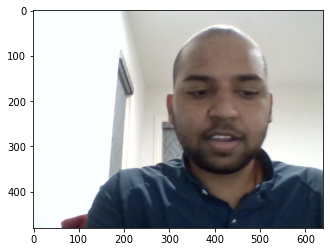

In [39]:
plt.imshow(myimage)

In [40]:
myimage = cv2.resize(myimage,(224,224))     # resize image to match model's expected sizing
myimage = myimage.reshape(1,224,224,3) # return the image with shaping that TF wants
    
print(main_model.predict(myimage))

[[2.7426518e-06]]
